<a href="https://colab.research.google.com/github/Enthusiasticguy/aviakompaniya_mijozlar_qoniqish/blob/main/aviakompaniya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # for normalization
from sklearn.model_selection import train_test_split

#we're gonna use some algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Enthusiasticguy/aviakompaniya_mijozlar_qoniqish/refs/heads/main/train_dataset.csv")

In [ ]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [13]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


`Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes`
bulardan tashqari qolgan numerical columnlar (1:5) yo (0:5) oralig'ida.

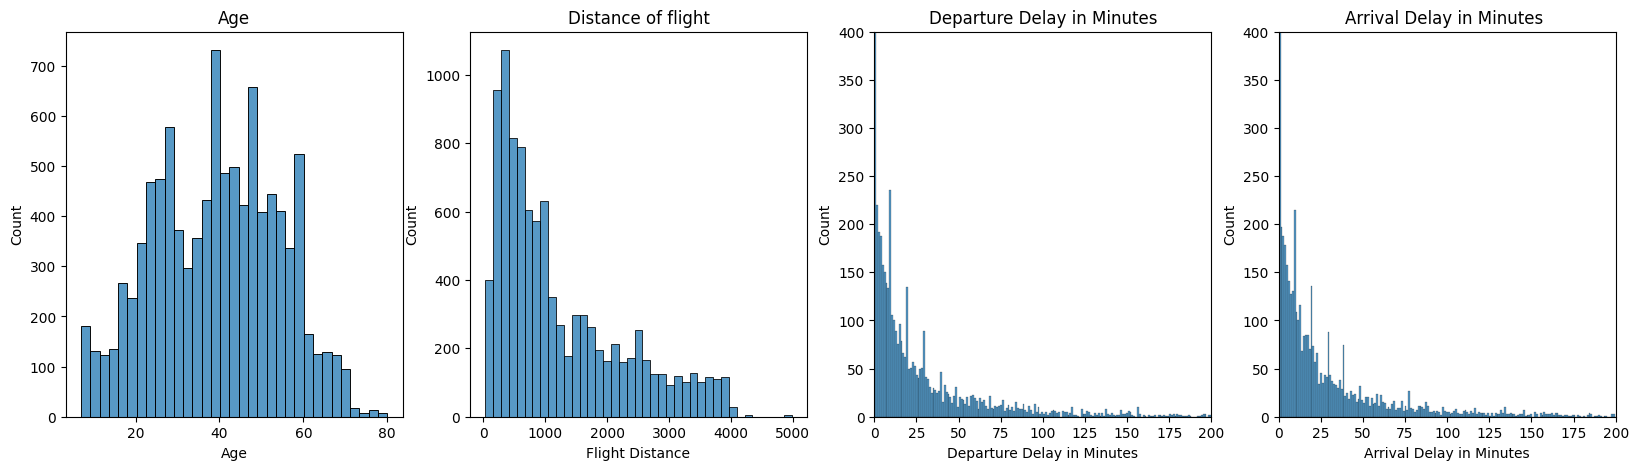

In [38]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

# Yosh
sns.histplot(x="Age", data=df, ax=axes[0])
axes[0].set_title("Age")

#MAsofa
sns.histplot(x="Flight Distance", data=df, ax=axes[1])
axes[1].set_title("Distance of flight")

#kechikish ketishdagi
axes[2].set_xlim(0, 200)
axes[2].set_ylim(0, 400)
sns.histplot(x="Departure Delay in Minutes", data=df, ax=axes[2])
axes[2].set_title("Departure Delay in Minutes")

#kechikish kelishdagi
axes[3].set_xlim(0, 200)  #outlierlar bor, shuning uchun limit beryapmiz
axes[3].set_ylim(0, 400)
sns.histplot(x="Arrival Delay in Minutes", data=df, ax=axes[3])
axes[3].set_title("Arrival Delay in Minutes ")

plt.show()

`Gender, Customer Type, Type of Travel, Class`
Bular categorical valuelar . ularni ham vizual qilib ko'rishimiz mumkin

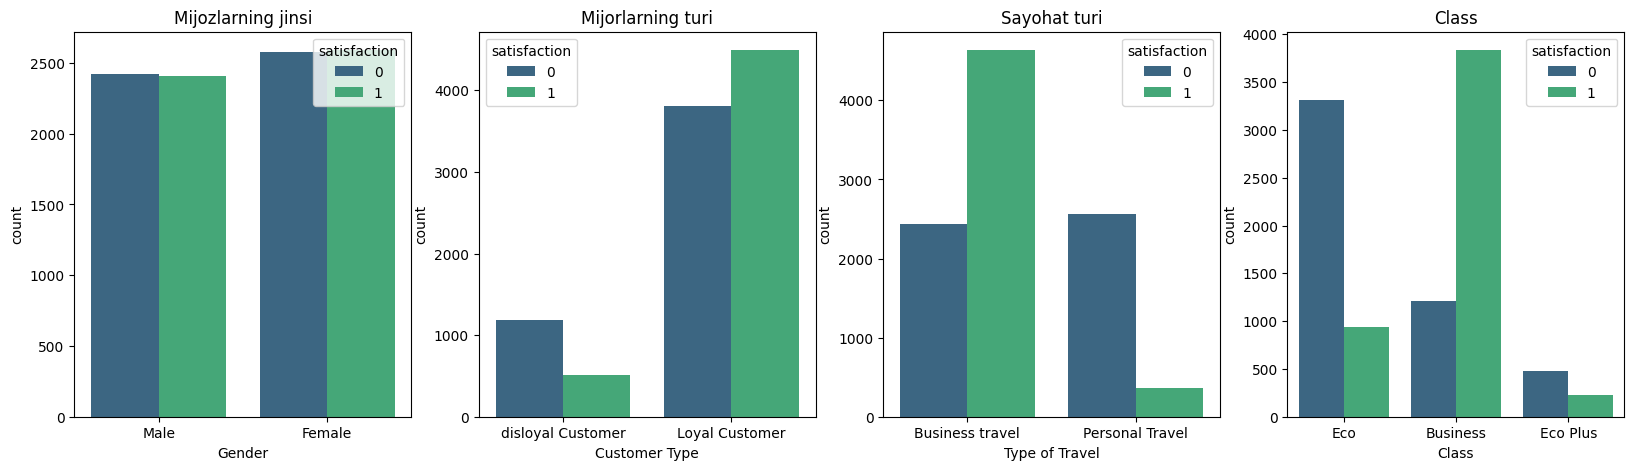

In [41]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Mijozlarning jinsi")

sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Mijorlarning turi")

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Sayohat turi")

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=df, ax=axes[3])
axes[3].set_title("Class")

plt.show()

#AGar satisfaction 0 bo'lsa, qoniqqan, aksincha qoniqmagan

# Korrelyatisyani ko'ramiz

In [42]:
df_numeric = df.drop(columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class'])
df_numeric.corrwith(df['satisfaction']).abs().sort_values(ascending=False)

,0
satisfaction,1.000000
Online boarding,0.504986
Inflight entertainment,0.400900
Seat comfort,0.342294
On-board service,0.326426
Leg room service,0.324368
Cleanliness,0.310338
Flight Distance,0.298703
Inflight wifi service,0.277395
Baggage handling,0.247965


Kam korrelyasiyalarni tashlab yuboramiz va categoriyali valuelarni qo'shib yangi df hosil qilamiz

In [45]:
data = df[['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',
       'satisfaction']]

* `Gender` - LablEncoder
* `Customer Type` - LabelEncoder
* `Type of travel` - LabelEncoder
* `Class` - LabelEncoder
* `Flight Distance` - Minmax Scaler\
the rest doesn't have be preprocesssed




In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the columns
label_encode_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
scaling_column = ['Flight Distance']
passthrough_columns = ['Inflight wifi service',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']  # demak preprocessing bolmaydigan columnlar

# Define transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('label_encoder', OrdinalEncoder(), label_encode_columns),  # Label encode categorical columns
        ('scaler', MinMaxScaler(), scaling_column),                # Scale 'Flight Distance'
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Create a pipeline with preprocessing and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

Pipeline apply qilib , data larni ajratamiz

In [58]:
X = data.drop(columns=['satisfaction'])
Y = data['satisfaction']

#pipeline
X_processed = pipeline.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42)


#**ML**

# **Logistic Regression**

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1002
           1       0.89      0.86      0.87       998

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

Accuracy Score:  0.877


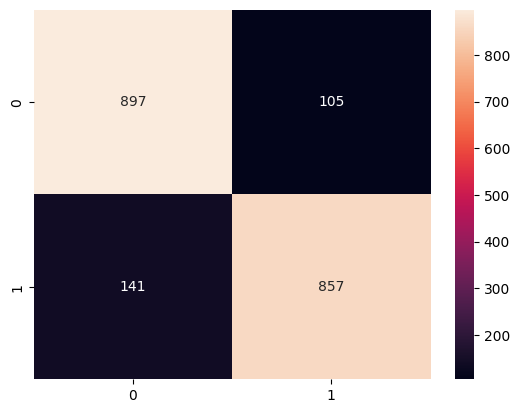

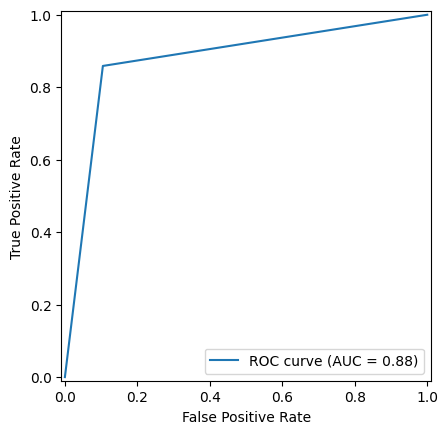

In [59]:
#Creating the model
L_R_model = LogisticRegression()
L_R_model.fit(X_train,Y_train)

#Evaluating the model

## Classification report
y_predicted = L_R_model.predict(X_test)
print(metrics.classification_report(Y_test,y_predicted))
print("Accuracy Score: ",metrics.accuracy_score(Y_test,y_predicted))

## Confusion matrix
conf_mat = metrics.confusion_matrix(Y_test,y_predicted)
sns.heatmap(data = conf_mat, annot = True, fmt = "g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = "ROC curve")
display.plot()
plt.show()

# **Support Vector machines**

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1002
           1       0.95      0.91      0.93       998

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Accuracy Score:  0.9305


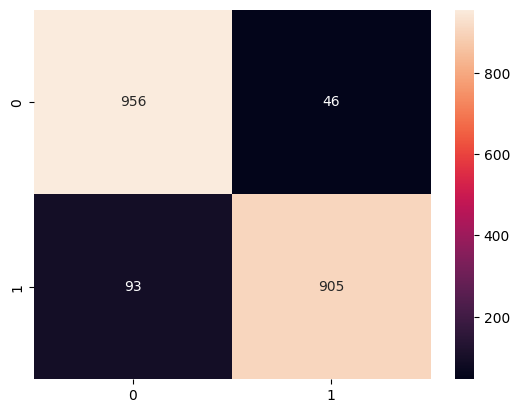

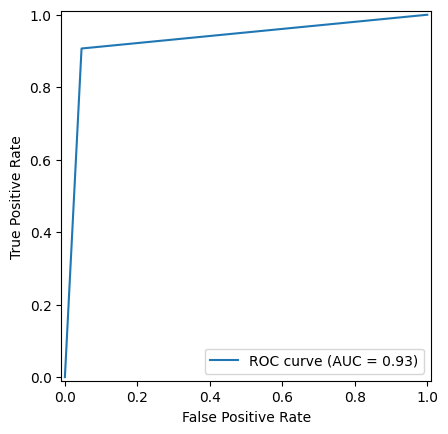

In [60]:
#Creating the model
svm_model = SVC()
svm_model.fit(X_train, Y_train)

#Evaluating the model

## Classifaction report
y_predicted = svm_model.predict(X_test)
print(metrics.classification_report(Y_test, y_predicted))
print("Accuracy Score: ",metrics.accuracy_score(Y_test,y_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, y_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

##ROC curve
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# **Decision Tree**

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1002
           1       0.94      0.93      0.93       998

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.93      2000

Accuracy score: 0.935


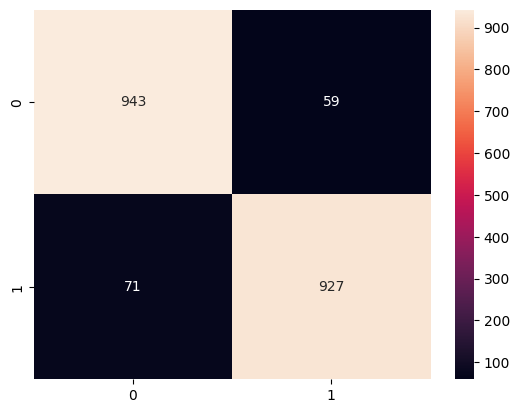

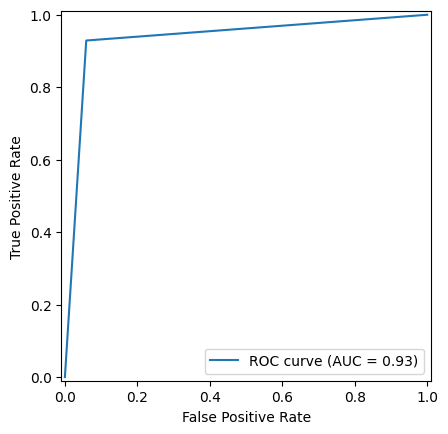

In [61]:
# Creating the model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

# Modelni baholaymiz
y_predicted = tree_model.predict(X_test)
print(metrics.classification_report(Y_test, y_predicted))
print("Accuracy score:", metrics.accuracy_score(Y_test,y_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, y_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# **Random Forest**

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1002
           1       0.96      0.93      0.94       998

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.9425


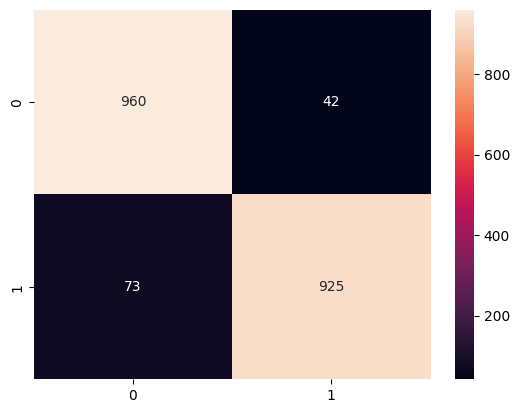

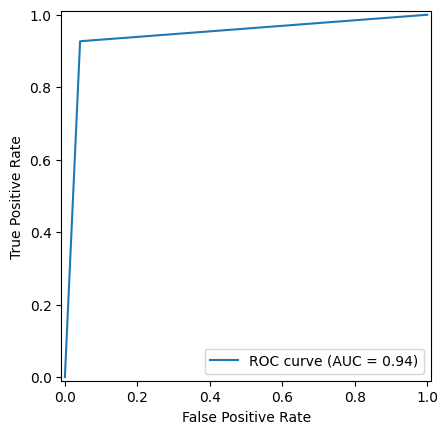

In [102]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=11)
RF_model.fit(X_train, Y_train)

# Modelni baholaymiz
y_predicted = RF_model.predict(X_test)
print(metrics.classification_report(Y_test, y_predicted))
print("Model aniqligi:", metrics.accuracy_score(Y_test,y_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, y_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# **Eng yaxshi model**
# **Logistic Regression** - 0.88
# **SVM** - 0.93
# **Decision Tree** - 0.93
# **Random Forest** - 0.95

In [93]:
df_test = pd.read_csv('https://raw.githubusercontent.com/Enthusiasticguy/aviakompaniya_mijozlar_qoniqish/refs/heads/main/test_dataset.csv')
df_test = df_test.drop(['id','Ease of Online booking','Age','Departure/Arrival time convenient','Arrival Delay in Minutes','Departure Delay in Minutes','Gate location'], axis = 1)

In [103]:
test_df = pipeline.fit_transform(df_test)

y_predicted = RF_model.predict(test_df)

predictions_df = pd.DataFrame({
    'id': df_test.index + 1,
    'satisfaction': y_predicted  # Predicted satisfaction values
})

# Save the DataFrame to a CSV file
predictions_df.to_csv('aviakompaniya_submission.csv', index=False)


In [99]:
test_df = pipeline.fit_transform(df_test)

y_predicted2 = tree_model.predict(test_df)

predictions_df2 = pd.DataFrame({
    'id': df_test.index + 1,
    'satisfaction': y_predicted2  # Predicted satisfaction values
})

# Save the DataFrame to a CSV file
predictions_df2.to_csv('aviakompaniya_submission2.csv', index=False)